**Submitted By Rameesha (24F-8010)**

#  Preprocess the Book

**Text Extraction**

In [1]:
pip install PyPDF2 # to extract txt from book install libraries


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.4 MB/s eta 0:00:00


In [2]:

import PyPDF2


pdf_path = '/content/drive/MyDrive/life.pdf'


with open(pdf_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    text = ''

    for page in range(len(reader.pages)):
        text += reader.pages[page].extract_text()


print(text[:500])


Also	by	Max	Tegmark
Our	Mathematical	UniverseThis	Is	a	Borzoi	Book	Published	by	Alfred	A.	Knopf
Copyright	©	2017	by	Max	Tegmark
All	rights	reserved.	Published	in	the	United	States	by	Alfred	A.	Knopf,	a	division	of	Penguin	Random
House	LLC,	New	York,	and	distributed	in	Canada	by	Random	House	of	Canada,	a	division	of	Penguin
Random	House	Canada	Limited,	Toronto.
www.aaknopf.com
Knopf,	Borzoi	Books	and	the	colophon	are	registered	trademarks	of	Penguin	Random	House	LLC.
Library	of	Congress	Catalogin


**Text Tokenization**

In [3]:
#  tokenize text using Python built-in split() method this method splits text on whitespaces
tokens = text.split()


print(tokens[:20])


['Also', 'by', 'Max', 'Tegmark', 'Our', 'Mathematical', 'UniverseThis', 'Is', 'a', 'Borzoi', 'Book', 'Published', 'by', 'Alfred', 'A.', 'Knopf', 'Copyright', '©', '2017', 'by']


# TF-IDF Vectorization

In [4]:
pip install scikit-learn


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Rejoin tokens into sentences bcz TF-IDF works on documents, not tokens
sentences = ' '.join(tokens)


vectorizer = TfidfVectorizer()

# Fit nd transform sentncs int0 matrix
tfidf_matrix = vectorizer.fit_transform([sentences])


print("TF-IDF Matrix shape:", tfidf_matrix.shape)


TF-IDF Matrix shape: (1, 10990)


# Plot t-SNE for TF-IDF

In [6]:
pip install matplotlib


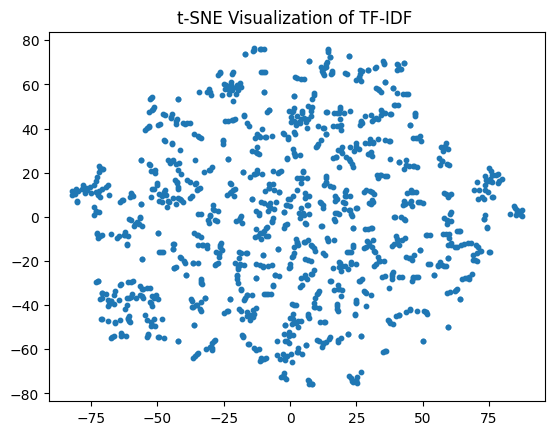

In [11]:
# Split the text into chunks
chunk_size = 100 #new chunk created after 100 words
chunks = [' '.join(tokens[i:i + chunk_size]) for i in range(0, len(tokens), chunk_size)]

# Apply TF-IDF to chunks
tfidf_matrix = vectorizer.fit_transform(chunks)

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=5, random_state=42)
tfidf_tsne = tsne_model.fit_transform(tfidf_matrix.toarray())

plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], s=10)
plt.title("t-SNE Visualization of TF-IDF ")
plt.show()


# Byte-Pair Encoding (BPE) and Word2Vec

**Byte-Pair Encoding (BPE)**

In [12]:
pip install tokenizers


In [13]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
from tokenizers.pre_tokenizers import Whitespace

# Initialize BPE model
tokenizer = Tokenizer(models.BPE())

# Set pre-tokenizer to split by whitespace
tokenizer.pre_tokenizer = Whitespace()

# Create BPE Trainer and set vocab size
trainer = trainers.BpeTrainer(vocab_size=10000)

# Train the tokenizer on book text
tokenizer.train_from_iterator([sentences], trainer=trainer)

# Tokenize the text using the trained BPE tokenizer
bpe_tokens = tokenizer.encode(sentences).tokens


print(bpe_tokens[:20])


['Also', 'by', 'Max', 'Tegmark', 'Our', 'Mathematical', 'Universe', 'This', 'Is', 'a', 'Borzoi', 'Book', 'Publ', 'ished', 'by', 'Alfred', 'A', '.', 'Knopf', 'Cop']


**Word2Vec**

In [14]:
pip install gensim


In [16]:
from gensim.models import Word2Vec

# Split BPE tokens into list of token list
token_list = [bpe_tokens]

# model training
word2vec_model = Word2Vec(sentences=token_list, vector_size=100, window=5, min_count=1, workers=4)


print("Vector for first token:", word2vec_model.wv[bpe_tokens[0]])


Vector for first token: [ 0.00662165  0.00372453 -0.00139004 -0.01170433  0.00742309 -0.00867032
  0.00563251 -0.00177012 -0.00163851  0.00635335 -0.0036994  -0.00951159
  0.0037202  -0.00334846  0.00107508  0.00480876 -0.00439097  0.00150162
  0.00614915 -0.01174742  0.00320689 -0.00214463  0.00758725  0.00519495
 -0.00935838 -0.00446357 -0.01099246 -0.01048248 -0.00145727 -0.00439884
  0.0005128   0.00014104  0.00589558  0.00067328 -0.00066936  0.01105634
  0.00097406 -0.00866689 -0.00892397  0.00199474 -0.00474114  0.00465549
  0.00032811  0.00646679 -0.00118041 -0.00918461 -0.00740594  0.00250957
 -0.00117835  0.00743555  0.00836381  0.00316077 -0.00946577  0.00220873
 -0.00258395 -0.00536516  0.00820199  0.00050065 -0.00907127 -0.00205479
  0.00461845 -0.00487579  0.00229689 -0.00453458 -0.00405651 -0.0011822
  0.00479823  0.00857116  0.00483228 -0.00084691  0.00528326  0.01192885
  0.00946569 -0.00882323  0.00296284 -0.00116313 -0.00368379 -0.0029287
  0.00048629 -0.00703559 -0.0

# Plot t-SNE for Word2Vec

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert Word2Vec vectors list to NumPy array
word_vectors_np = np.array(word_vectors)

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=5, random_state=42)
word2vec_tsne = tsne_model.fit_transform(word_vectors_np)


plt.scatter(word2vec_tsne[:, 0], word2vec_tsne[:, 1], s=10)
plt.title("t-SNE Visualization of Word2Vec")
plt.show()


In [ ]:
print("Shape of word_vectors_np:", word_vectors_np.shape)


Shape of word_vectors_np: (151521, 100)


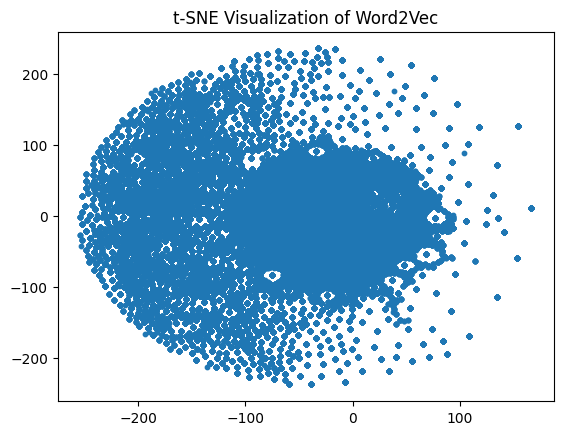

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=min(5, word_vectors_np.shape[0] - 1), random_state=42)
word2vec_tsne = tsne_model.fit_transform(word_vectors_np)


plt.scatter(word2vec_tsne[:, 0], word2vec_tsne[:, 1], s=10)
plt.title("t-SNE Visualization of Word2Vec")
plt.show()
